In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import LinearRegression
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics import accuracy_score, precision_score,recall_score,confusion_matrix
from sklearn.pipeline import make_pipeline
import pickle

In [2]:

data=pd.read_csv('phishing_site_urls.csv')
print(data.shape)

(549346, 2)


In [3]:
data

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad
...,...,...
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad


In [4]:
data.isnull().sum()

URL      0
Label    0
dtype: int64

In [5]:
data.duplicated().sum()

42150

In [6]:
data.Label.value_counts()

Label
good    392924
bad     156422
Name: count, dtype: int64

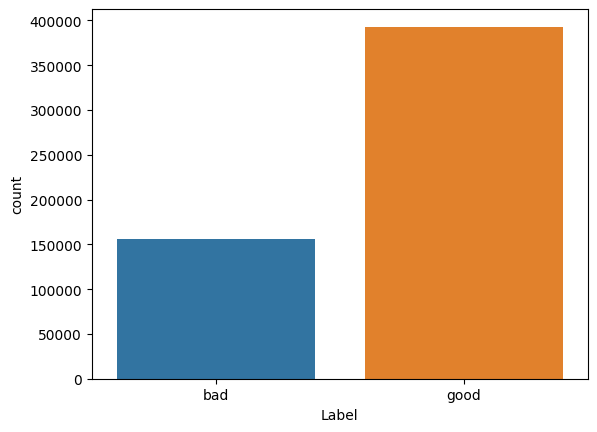

In [7]:
sns.countplot(data=data,x='Label')
plot.show()

In [8]:
data_mix=shuffle(data)

In [9]:
data_size=5000

In [10]:
data_used=data_mix[:data_size].copy()

In [11]:
data_used
data_used.info

<bound method DataFrame.info of                                                       URL Label
549221                              dkdlnbcfokbebflc.co /   bad
526128                    frostnetworks.com/frodo/?a=3325   bad
64272                                   www.nic.ad.jp/en/  good
43246   todthillhouseforsale.com/gallery/online.lloyds...   bad
322477  enotes.com/topic/Princess_Christa_of_Thurn_and...  good
...                                                   ...   ...
435388                         spoke.com/dir/p/malone/joe  good
4454                          www.abainstitut.com/images/   bad
253198                                   ukjazzradio.com/  good
318771   ebay.com/sch/i.html?_nkw=hallmark+greeting+cards  good
486067          blog.iclt.am/wp-includes/pomo/src.php?id=   bad

[5000 rows x 2 columns]>

In [12]:
data_used.replace({'good':0,'bad':1},inplace =True)

In [13]:
data_used.head()

,URL,Label
549221,dkdlnbcfokbebflc.co /,1
526128,frostnetworks.com/frodo/?a=3325,1
64272,www.nic.ad.jp/en/,0
43246,todthillhouseforsale.com/gallery/online.lloyds...,1
322477,enotes.com/topic/Princess_Christa_of_Thurn_and...,0


In [14]:

data_used.duplicated().sum()


5

In [15]:
data_used.drop_duplicates(inplace=True)

In [16]:
data_used.duplicated().sum()

0

In [17]:
data_used.shape

(4995, 2)

In [18]:
data_used.replace({'good':0,'bad':1},inplace =True)

In [19]:
data_used.Label.value_counts()

Label
0    3540
1    1455
Name: count, dtype: int64

In [20]:
x=data_used[['URL']].copy()
y=data_used.Label.copy()


In [21]:
print(y.shape,y)

(4995,) 549221    1
526128    1
64272     0
43246     1
322477    0
         ..
435388    0
4454      1
253198    0
318771    0
486067    1
Name: Label, Length: 4995, dtype: int64


In [22]:
tokenizer=RegexpTokenizer(r'[A-Za-z]+')
stemmer=SnowballStemmer("english")
cv=CountVectorizer()

In [23]:
def prepare_data(x):
    x['text_tokenized']=x.URL.map(lambda t:tokenizer.tokenize(t))
    x['text_stemmed']=x.text_tokenized.map(lambda t:[stemmer.stem(word) for word in t])
    x['text_sent']=x.text_stemmed.map(lambda t:' '.join(t))   
    feature=cv.fit_transform(x.text_sent).toarray()
    return x, feature
    

In [24]:
x,feature= prepare_data(x)

In [25]:
print(feature[:5])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:
logreg = LogisticRegression()


In [27]:
x_train,x_test,y_train,y_test=train_test_split(feature,y)

In [28]:
logreg.fit(x_train,y_train)

LogisticRegression()

In [29]:
logreg.score(x_test,y_test)

0.8935148118494796

In [30]:
pre=logreg.predict(x_test)

In [31]:
acc=accuracy_score(y_test,pre)

In [32]:
print(acc)

0.8935148118494796


In [33]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())
##(r'\b(?:http|ftp)s?://\S*\w|\w+|[^\w\s]+') ([a-zA-Z]+)([0-9]+) -- these tolenizers giving me low accuray 

In [34]:
trainX, testX, trainY, testY = train_test_split(data.URL, data.Label)

In [35]:
pipeline_ls.fit(trainX,trainY)

/home/abhishek/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/abhishek/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [36]:
pipeline_ls.score(testX,testY) 

0.9679110509185435

In [37]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [38]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9679110509185435


In [39]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

['bad' 'bad' 'bad' 'bad']
******************************
['good' 'good' 'good' 'good']
